<a href="https://colab.research.google.com/github/emredog/deep-head-pose/blob/master/Collab_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparations

- Mount Google Drive 
- Copy and extract data,
- Checkout or pull to get the latest code from github.

## Data

In [6]:
import os, time

colab_data_dir = "/content/data/"
gdrive_workspace = r"/gdrive/My Drive/colab_workspace/advertima/data"

if not os.path.exists(colab_data_dir):
  !mkdir {colab_data_dir}
  print("Data folder created.")

if not os.path.exists("/gdrive"):
  print("Mounting google drive")
  from google.colab import drive
  drive.mount('/gdrive')
print("Google drive is mounted at /gdrive")
  
traindata_prefix = "300W_LP"
traindata_dir = os.path.join(colab_data_dir, traindata_prefix)
testdata_prefix = "AFLW2000"
testdata_dir = os.path.join(colab_data_dir, testdata_prefix)  
  
  
start_time = time.time()
if not os.path.exists(traindata_dir):  
  print("Extracting {}...".format(traindata_prefix))
  !unzip -qq -n {os.path.join(gdrive_workspace.replace(" ", "\ "), traindata_prefix) + ".zip"} -d  {colab_data_dir}
elapsed_time = time.time() - start_time
print("{} is ready ({:.1f} sec)".format(os.path.join(colab_data_dir, traindata_prefix), elapsed_time))
  
start_time = time.time()
if not os.path.exists(testdata_dir):  
  print("Extracting {}...".format(testdata_prefix)),
  !unzip -qq -n {os.path.join(gdrive_workspace.replace(" ", "\ "), testdata_prefix) + ".zip"} -d  {colab_data_dir}
elapsed_time = time.time() - start_time
print("{} is ready ({:.1f} sec)".format(os.path.join(colab_data_dir, testdata_prefix), elapsed_time))

!ls {colab_data_dir}

Google drive is mounted at /gdrive
/content/data/300W_LP is ready (0.0 sec)
/content/data/AFLW2000 is ready (0.0 sec)
300W_LP  300W_LP_filenames.txt	AFLW2000  AFLW2000_filenames.txt


## Code from github

In [10]:
%cd /content
if not os.path.exists("/content/deep-head-pose"):
  # Clone the entire repo.
  !git clone -l -s https://github.com/emredog/deep-head-pose.git deep-head-pose
  %cd deep-head-pose/code
else:
  %cd deep-head-pose/code
  !git pull

/content
/content/deep-head-pose/code
remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (1/1), done.
remote: Total 4 (delta 3), reused 4 (delta 3), pack-reused 0
Unpacking objects: 100% (4/4), done.
From https://github.com/emredog/deep-head-pose
   41a5fa3..42cd882  master     -> origin/master
Updating 41a5fa3..42cd882
Fast-forward
 code/test_hopenet.py | 4 +++-
 1 file changed, 3 insertions(+), 1 deletion(-)


## Fetch or generate filenames

In [4]:
from shutil import copyfile
import utils
       
  

for prefix in [traindata_prefix, testdata_prefix]:
  if not os.path.exists(os.path.join(colab_data_dir, prefix + "_filenames.txt")):
    # check the cache
    if os.path.exists(os.path.join(gdrive_workspace, prefix + "_filenames.txt")):
      copyfile(os.path.join(gdrive_workspace, prefix + "_filenames.txt"), 
               os.path.join(colab_data_dir, prefix + "_filenames.txt"))
    else:
      # generate from scratch
      utils.generate_filenames(os.path.join(colab_data_dir, prefix))
      copyfile(os.path.join(colab_data_dir, prefix + "_filenames.txt"), 
               os.path.join(gdrive_workspace, prefix + "_filenames.txt"))
    

  
print("Filenames files are ready.")
!ls -l {colab_data_dir}

Filenames files are ready.
total 4692
drwxr-xr-x 12 root root    4096 Nov 25  2015 300W_LP
-rw-r--r--  1 root root 4618569 Aug 16 06:30 300W_LP_filenames.txt
drwxr-xr-x  3 root root  139264 Mar 29  2016 AFLW2000
-rw-r--r--  1 root root   39380 Aug 16 06:30 AFLW2000_filenames.txt


# Experiment 0: Training Hopenet on 300W_LP
Let's reproduce the training process in the paper





## Train

In [0]:
# batch size is 128, see https://github.com/natanielruiz/deep-head-pose/issues/55

# filename_list = os.path.join(colab_data_dir, testdata_prefix) + "_filenames.txt"
# !python train_hopenet.py --num_epochs 5 --batch_size 128 --lr 10e-5 --dataset AFLW2000 --data_dir /content/data --alpha 2 --filename_list {filename_list} --output_string Debug_on_AFLW2000 --out_dir {gdrive_workspace.replace(" ", "\ ")}

filename_list = os.path.join(colab_data_dir, traindata_prefix) + "_filenames.txt"
!python train_hopenet.py --num_epochs 25 --batch_size 128 --lr 10e-5 --dataset Pose_300W_LP --data_dir /content/data --alpha 2 --filename_list {filename_list} --output_string Reproduce_300W_LP_ --out_dir {gdrive_workspace.replace(" ", "\ ")}


Loading data.
Ready to train network.
Epoch [1/25], Iter [100/956] Losses: Yaw 208.4192, Pitch 260.9868, Roll 151.6089
Epoch [1/25], Iter [200/956] Losses: Yaw 117.3504, Pitch 220.0611, Roll 180.0715
Epoch [1/25], Iter [300/956] Losses: Yaw 103.4418, Pitch 181.4670, Roll 102.9651
Epoch [1/25], Iter [400/956] Losses: Yaw 84.4190, Pitch 110.1129, Roll 113.1441
Epoch [1/25], Iter [500/956] Losses: Yaw 52.0928, Pitch 72.8473, Roll 73.6279
Epoch [1/25], Iter [600/956] Losses: Yaw 5009.6548, Pitch 398.6605, Roll 429.7704
Epoch [1/25], Iter [700/956] Losses: Yaw 1925.0472, Pitch 321.9773, Roll 316.0841
Epoch [1/25], Iter [800/956] Losses: Yaw 1863.8120, Pitch 316.4185, Roll 267.6097
Epoch [1/25], Iter [900/956] Losses: Yaw 503.2821, Pitch 206.6443, Roll 260.0581
Epoch completed in 1196.1 seconds. Taking snapshot...
Epoch [2/25], Iter [100/956] Losses: Yaw 400.2158, Pitch 269.2081, Roll 251.8150
Epoch [2/25], Iter [200/956] Losses: Yaw 1531.4432, Pitch 300.8517, Roll 248.9890
Epoch [2/25], Ite

## Display Losses

21054


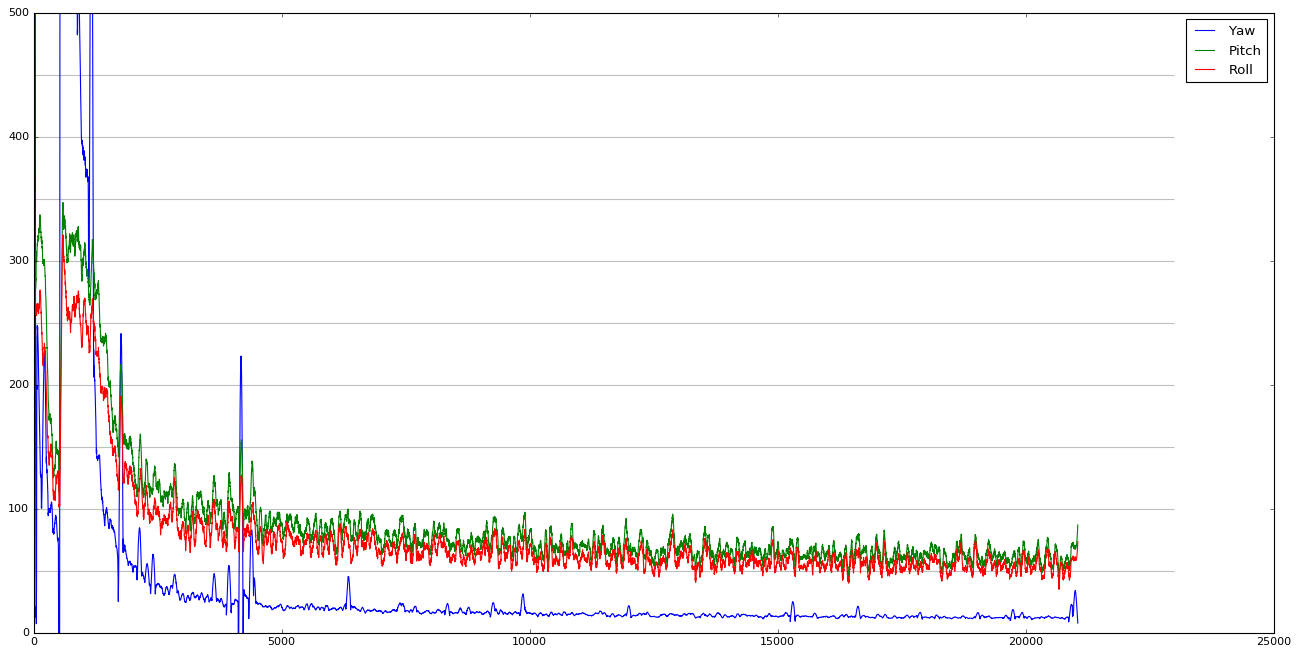

In [0]:
import pickle as pkl
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter # smoothing the curves
plt.style.use('classic')
%matplotlib inline

loss_file = gdrive_workspace + "/lossesReproduce_300W_LP_.pkl"
with open(loss_file, "rb") as file_handle:
  training_stats = pkl.load(file_handle)
  
print(len(training_stats["loss_yaw"]))

smoothing = lambda x: savgol_filter(x, 101, 3)

fig=plt.figure(figsize=(20, 10), dpi= 80, facecolor='w', edgecolor='k')

plt.plot(smoothing(training_stats["loss_yaw"]), label="Yaw")
plt.plot(smoothing(training_stats["loss_pitch"]), label="Pitch")
plt.plot(smoothing(training_stats["loss_roll"]), label="Roll")

plt.hlines(list(range(0, 500, 50)), 0, 23000, color='0.75')
plt.ylim(0, 500)
plt.legend()
plt.show()            

## Test with pretrained & reproduced model
**First, let's test with the provided pre-trained model (downloadable from original github page).**

In [0]:
model_path = os.path.join(gdrive_workspace, "weights", "hopenet_alpha2.pkl")

filename_list = os.path.join(colab_data_dir, testdata_prefix) + "_filenames.txt"
print("Batch size=1")
!python test_hopenet.py --batch_size 1 --dataset AFLW2000 --data_dir /content/data --filename_list {filename_list} --snapshot {model_path.replace(" ", "\ ")}

print("\nBatch size=64")
!python test_hopenet.py --batch_size 32 --dataset AFLW2000 --data_dir /content/data --filename_list {filename_list} --snapshot {model_path.replace(" ", "\ ")}

Batch size=1
Loading snapshot.
Loading data.
Ready to test network.
/usr/local/lib/python3.6/dist-packages/torch/nn/_reduction.py:46: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
Test error in degrees of the model on the 1969 test images. Yaw: 6.4682, Pitch: 6.5448, Roll: 5.4226
Average inference time per image: 14.820448ms

Batch size=64
Loading snapshot.
Loading data.
Ready to test network.
/usr/local/lib/python3.6/dist-packages/torch/nn/_reduction.py:46: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
Test error in degrees of the model on the 1969 test images. Yaw: 6.4682, Pitch: 6.5448, Roll: 5.4226
Average inference time per image: 1.210401ms


Result: Yaw: 6.4682, Pitch: 6.5448, Roll: 5.4226,  **MAE: 6,1452**

This is pretty close to Table 1 in paper.

**Now, try it with the model that I trained. NOTE: it was trained only for 22 epochs (due to Colab limitations), so I expect worse results than the pre-trained model, which was trained for 25 epochs according to paper.**

In [0]:
model_path = os.path.join(gdrive_workspace, "reproducing_paper_results", "Reproduce_300W_LP__epoch_22.pkl")

filename_list = os.path.join(colab_data_dir, testdata_prefix) + "_filenames.txt"
!python test_hopenet.py --batch_size 64 --dataset AFLW2000 --data_dir /content/data --filename_list {filename_list} --snapshot {model_path.replace(" ", "\ ")}

Loading snapshot.
Loading data.
Ready to test network.
/usr/local/lib/python3.6/dist-packages/torch/nn/_reduction.py:46: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
Test error in degrees of the model on the 1969 test images. Yaw: 17.3588, Pitch: 9.3072, Roll: 9.1508


Result: Yaw: 17.3588, Pitch: 9.3072, Roll: 9.1508, **MAE: 11.939**



**The gap is rather large, actually a bit higher than what I expected.**.

# Experiment 2.1: Train a Hopenet variant with Mobilenet backbone

## Train

In [0]:
filename_list = os.path.join(colab_data_dir, traindata_prefix) + "_filenames.txt"
val_filename_list = os.path.join(colab_data_dir, testdata_prefix) + "_filenames.txt"
!python train_hopenet_mobilenet.py --num_epochs 30 --batch_size 128 --mobilenet_width 0.5 --lr 10e-5 --dataset Pose_300W_LP --data_dir /content/data --alpha 2 --filename_list {filename_list} --val_filename_list {val_filename_list} --output_string MobileNet_HALFWIDTH2_on_Pose_300W_LP --out_dir {gdrive_workspace.replace(" ", "\ ")}

Loading data.
Ready to train network.
Epoch [1/30], Iter [100/956] Losses: Yaw 1773.0428, Pitch 291.0356, Roll 303.0475
Epoch [1/30], Iter [200/956] Losses: Yaw 833.6812, Pitch 262.7263, Roll 290.9182
Epoch [1/30], Iter [300/956] Losses: Yaw 709.5158, Pitch 271.5333, Roll 168.7082
Epoch [1/30], Iter [400/956] Losses: Yaw 1122.2262, Pitch 338.7652, Roll 227.5169
Epoch [1/30], Iter [500/956] Losses: Yaw 346.9140, Pitch 256.2077, Roll 195.2256
Epoch [1/30], Iter [600/956] Losses: Yaw 1238.2626, Pitch 369.2566, Roll 195.8279
Epoch [1/30], Iter [700/956] Losses: Yaw 426.6660, Pitch 257.5620, Roll 293.1282
Epoch [1/30], Iter [800/956] Losses: Yaw 311.6113, Pitch 227.7444, Roll 181.2004
Epoch [1/30], Iter [900/956] Losses: Yaw 374.1505, Pitch 304.7700, Roll 339.3631
Epoch completed in 955.3 seconds. Taking snapshot...
Validation error in degrees of the model on the 1969 test images. Yaw: 37.7582, Pitch: 12.8756, Roll: 13.5778
Epoch [2/30], Iter [100/956] Losses: Yaw 214.0641, Pitch 279.2149, 

Resume training for some more

In [0]:
filename_list = os.path.join(colab_data_dir, traindata_prefix) + "_filenames.txt"
val_filename_list = os.path.join(colab_data_dir, testdata_prefix) + "_filenames.txt"
last_snapshot = os.path.join(gdrive_workspace.replace(" ", "\ "), "MobileNet_HALFWIDTH2_on_Pose_300W_LP_epoch_18.pkl")
!python train_hopenet_mobilenet.py --snapshot {last_snapshot} --num_epochs 20 --batch_size 128 --mobilenet_width 0.5 --lr 10e-5 --dataset Pose_300W_LP --data_dir /content/data --alpha 2 --filename_list {filename_list} --val_filename_list {val_filename_list} --output_string MobileNet_HALFWIDTH2_18_on_Pose_300W_LP --out_dir {gdrive_workspace.replace(" ", "\ ")}

Loading weights from  /gdrive/My Drive/colab_workspace/advertima/data/MobileNet_HALFWIDTH2_on_Pose_300W_LP_epoch_18.pkl
Loading data.
Ready to train network.
Epoch [1/20], Iter [100/956] Losses: Yaw 22.6529, Pitch 39.0430, Roll 31.6097
Epoch [1/20], Iter [200/956] Losses: Yaw 16.1924, Pitch 286.9150, Roll 273.5739
Epoch [1/20], Iter [300/956] Losses: Yaw 18.2267, Pitch 157.1980, Roll 133.4327
Epoch [1/20], Iter [400/956] Losses: Yaw 18.9955, Pitch 171.0641, Roll 156.3464
Epoch [1/20], Iter [500/956] Losses: Yaw 16.5218, Pitch 91.1002, Roll 81.4354
Epoch [1/20], Iter [600/956] Losses: Yaw 17.4555, Pitch 70.3390, Roll 52.8045
Epoch [1/20], Iter [700/956] Losses: Yaw 13.3983, Pitch 68.0693, Roll 38.5564
Epoch [1/20], Iter [800/956] Losses: Yaw 25.2434, Pitch 68.1865, Roll 57.6952
Epoch [1/20], Iter [900/956] Losses: Yaw 16.8504, Pitch 39.2647, Roll 26.3438
Epoch completed in 944.5 seconds. Taking snapshot...
Validation error in degrees of the model on the 1969 test images. Yaw: 21.6549, P

## Display losses

17226


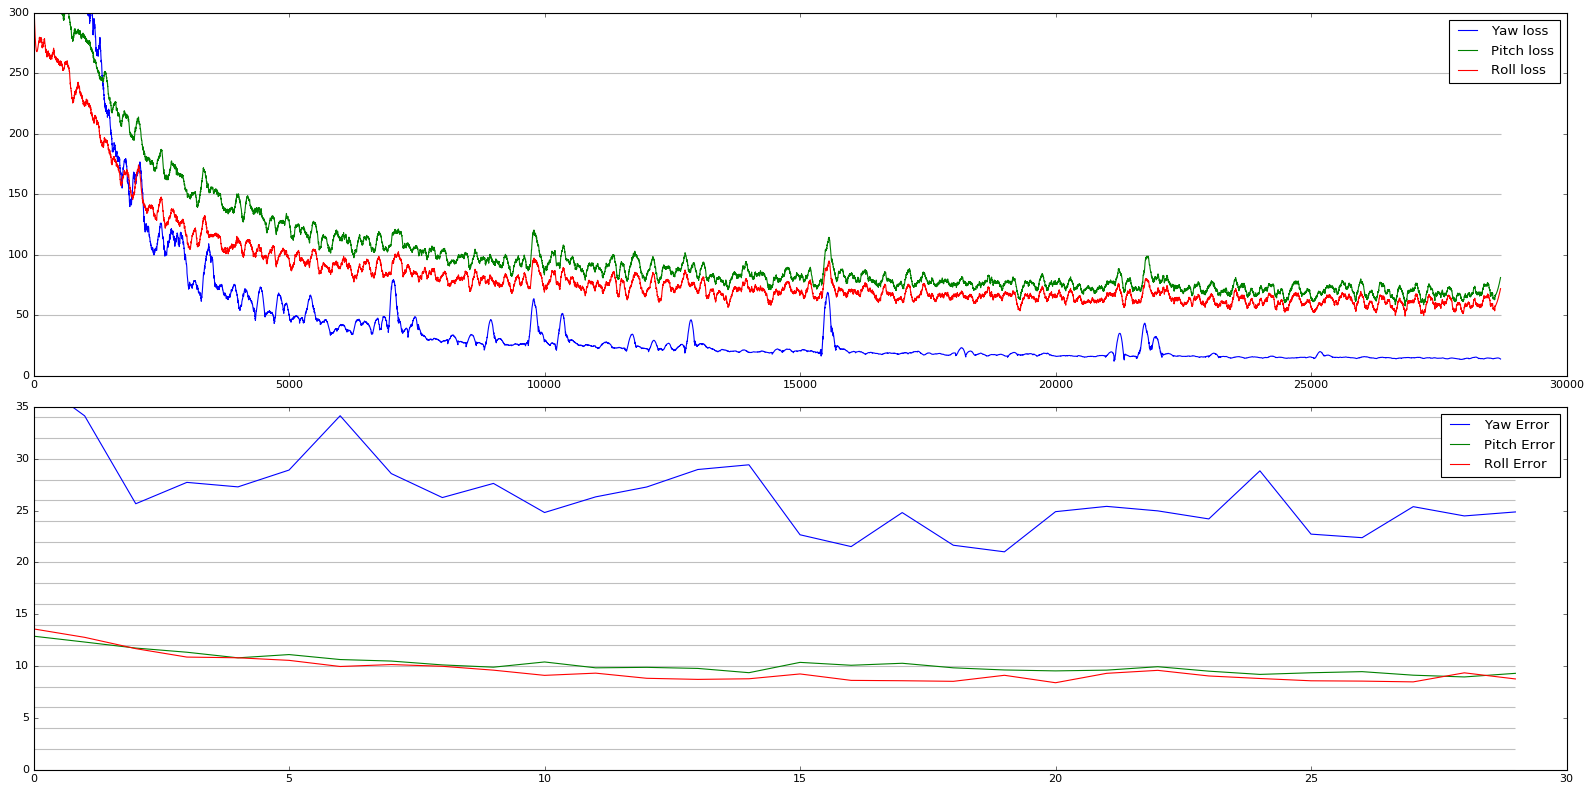

In [0]:
import pickle as pkl
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter # smoothing the curves
plt.style.use('classic')
%matplotlib inline

loss_file = gdrive_workspace + "/lossesMobileNet_HALFWIDTH2_on_Pose_300W_LP.pkl"
with open(loss_file, "rb") as file_handle:
  training_stats = pkl.load(file_handle)
  
# stats from resumed  
loss_file = gdrive_workspace + "/lossesMobileNet_HALFWIDTH2_18_on_Pose_300W_LP.pkl"
with open(loss_file, "rb") as file_handle:
  training_stats2 = pkl.load(file_handle)
  
print(len(training_stats["loss_yaw"]))

smoothing = lambda x: savgol_filter(x, 201, 3)

train_samples = len(training_stats["loss_yaw"]) + len(training_stats2["loss_yaw"])
val_samples = len(training_stats["val_yaw_error"]) + len(training_stats2["val_yaw_error"])


f, axes = plt.subplots(2, 1, sharex="none", figsize=(20, 10), dpi= 80, facecolor='w', edgecolor='k')
axes[0].plot(range(train_samples), smoothing(training_stats["loss_yaw"] + training_stats2["loss_yaw"]), label="Yaw loss")
axes[0].plot(range(train_samples), smoothing(training_stats["loss_pitch"] + training_stats2["loss_pitch"]), label="Pitch loss")
axes[0].plot(range(train_samples), smoothing(training_stats["loss_roll"] + training_stats2["loss_roll"]), label="Roll loss")
axes[0].hlines(list(range(0, 500, 50)), 0, train_samples-1, color='0.75')
axes[0].set_ylim(0, 300)
axes[0].legend()

axes[1].plot(training_stats["val_yaw_error"] + training_stats2["val_yaw_error"], label="Yaw Error")
axes[1].plot(training_stats["val_pitch_error"] + training_stats2["val_pitch_error"], label="Pitch Error")
axes[1].plot(training_stats["val_roll_error"] + training_stats2["val_roll_error"], label="Roll Error")
axes[1].hlines(list(range(0, 35, 2)), 0, val_samples-1, color='0.75')
axes[1].set_ylim(0, 35)
axes[1].legend()

f.tight_layout()
plt.show()

## Test all models with MobileNet Backbone

In [0]:
model_path = os.path.join(gdrive_workspace, "mobilenet_backbone_full", "MobileNet_on_Pose_300W_LP_epoch_10.pkl")

print("Batch Size=1")
filename_list = os.path.join(colab_data_dir, testdata_prefix) + "_filenames.txt"
!python test_hopenet.py --batch_size 1 --dataset AFLW2000 --data_dir /content/data --backbone mobilenet --filename_list {filename_list} --snapshot {model_path.replace(" ", "\ ")}

print("\nBatch Size=64")

!python test_hopenet.py --batch_size 64 --dataset AFLW2000 --data_dir /content/data --backbone mobilenet --filename_list {filename_list} --snapshot {model_path.replace(" ", "\ ")}

Batch Size=1
Loading snapshot.
Loading data.
Ready to test network.
/usr/local/lib/python3.6/dist-packages/torch/nn/_reduction.py:46: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
Test error in degrees of the model on the 1969 test images. Yaw: 10.0282, Pitch: 7.1470, Roll: 6.8022
Average inference time per image: 13.310854ms

Batch Size=64
Loading snapshot.
Loading data.
Ready to test network.
/usr/local/lib/python3.6/dist-packages/torch/nn/_reduction.py:46: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
Test error in degrees of the model on the 1969 test images. Yaw: 10.0282, Pitch: 7.1470, Roll: 6.8022
Average inference time per image: 0.506598ms


In [0]:
model_path = os.path.join(gdrive_workspace, "mobilenet_backbone_half", "MobileNet_HALFWIDTH2_18_on_Pose_300W_LP_epoch_12.pkl")

print("Batch Size=1")
filename_list = os.path.join(colab_data_dir, testdata_prefix) + "_filenames.txt"
!python test_hopenet.py --batch_size 1 --dataset AFLW2000 --data_dir /content/data --backbone mobilenet --mobilenet_width 0.5 --filename_list {filename_list} --snapshot {model_path.replace(" ", "\ ")}

print("\nBatch Size=64")

!python test_hopenet.py --batch_size 64 --dataset AFLW2000 --data_dir /content/data --backbone mobilenet --mobilenet_width 0.5  --filename_list {filename_list} --snapshot {model_path.replace(" ", "\ ")}

Batch Size=1
Loading snapshot.
Loading data.
Ready to test network.
/usr/local/lib/python3.6/dist-packages/torch/nn/_reduction.py:46: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
Test error in degrees of the model on the 1969 test images. Yaw: 24.8693, Pitch: 9.2887, Roll: 8.7474
Average inference time per image: 13.128671ms

Batch Size=64
Loading snapshot.
Loading data.
Ready to test network.
/usr/local/lib/python3.6/dist-packages/torch/nn/_reduction.py:46: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
Test error in degrees of the model on the 1969 test images. Yaw: 24.8693, Pitch: 9.2887, Roll: 8.7474
Average inference time per image: 0.448521ms


# Experiment 2.2: Train Hopenet variant with ShuffleNet backbone

## Train ShuffleNet x1.0

In [0]:
filename_list = os.path.join(colab_data_dir, traindata_prefix) + "_filenames.txt"
val_filename_list = os.path.join(colab_data_dir, testdata_prefix) + "_filenames.txt"
!python train_hopenet_shufflenet.py --num_epochs 30 --batch_size 128 --shufflenet_mult 1.0 --lr 10e-5 --dataset Pose_300W_LP --data_dir /content/data --alpha 2 --filename_list {filename_list} --val_filename_list {val_filename_list} --output_string shufflenet_full --out_dir {gdrive_workspace.replace(" ", "\ ")}

Downloading: "https://download.pytorch.org/models/shufflenetv2_x1-5666bf0f80.pth" to /root/.cache/torch/checkpoints/shufflenetv2_x1-5666bf0f80.pth
100% 9218294/9218294 [00:01<00:00, 4785283.20it/s]
Loading data.
Ready to train network.
Epoch [1/30], Iter [100/956] Losses: Yaw 365.8046, Pitch 324.4092, Roll 402.9696
Epoch [1/30], Iter [200/956] Losses: Yaw 160.0199, Pitch 214.8037, Roll 179.6983
Epoch [1/30], Iter [300/956] Losses: Yaw 119.3050, Pitch 295.1337, Roll 324.0338
Epoch [1/30], Iter [400/956] Losses: Yaw 74.9764, Pitch 246.5353, Roll 292.4044
Epoch [1/30], Iter [500/956] Losses: Yaw 61.7122, Pitch 65.8523, Roll 95.6194
Epoch [1/30], Iter [600/956] Losses: Yaw 86.7695, Pitch 131.5772, Roll 141.3119
Epoch [1/30], Iter [700/956] Losses: Yaw 36.2129, Pitch 286.4509, Roll 261.6203
Epoch [1/30], Iter [800/956] Losses: Yaw 42.6287, Pitch 62.5842, Roll 45.6156
Epoch [1/30], Iter [900/956] Losses: Yaw 44.3392, Pitch 84.9246, Roll 54.2427
Epoch completed in 784.0 seconds. Taking snapsh

## Display Losses ShuffleNet x1.0

9570


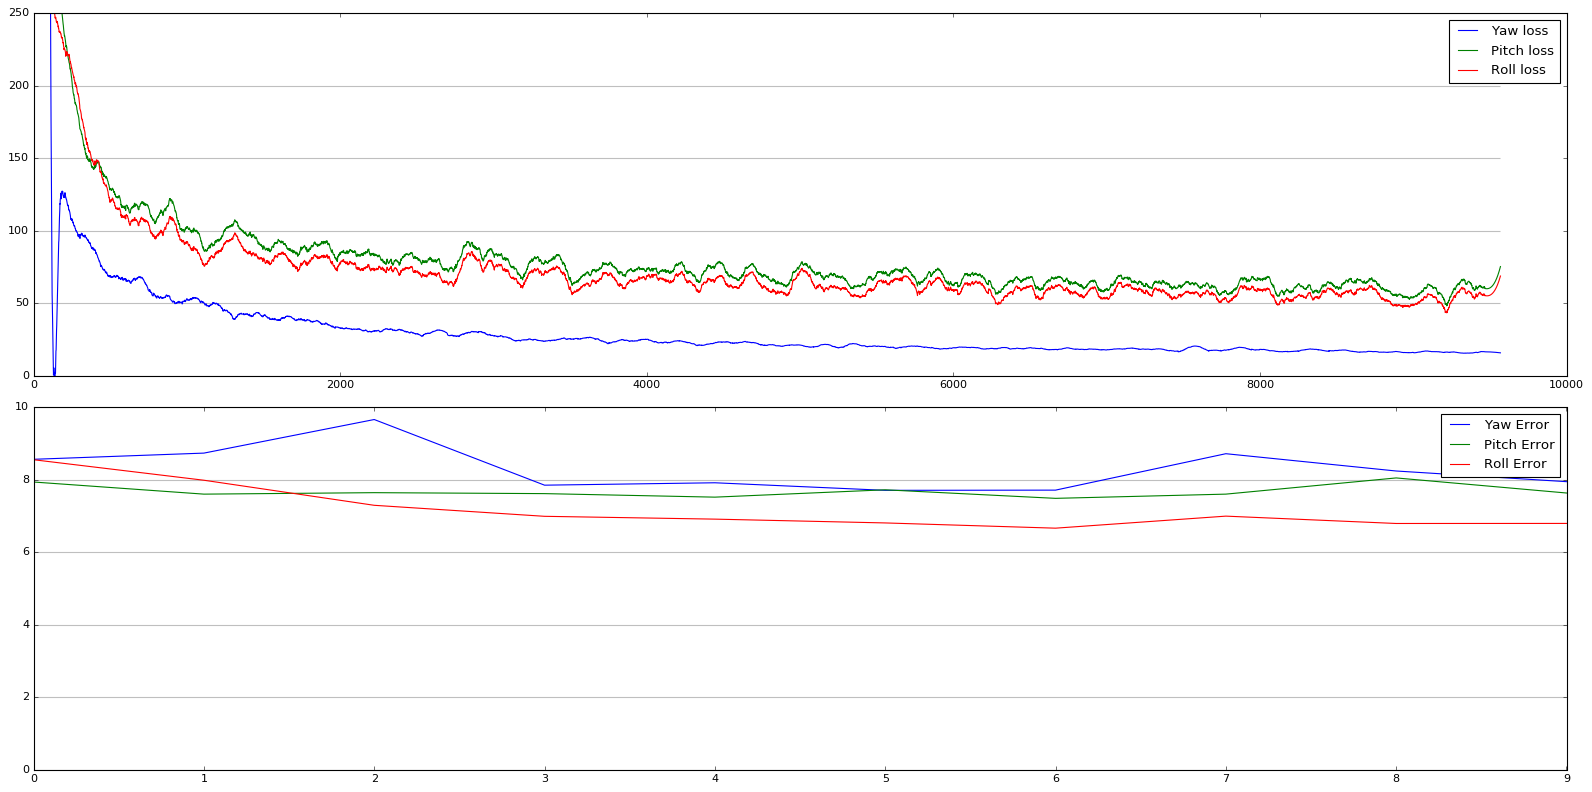

In [0]:
import pickle as pkl
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter # smoothing the curves
plt.style.use('classic')
%matplotlib inline

loss_file = gdrive_workspace + "/lossesshufflenet_full.pkl"
with open(loss_file, "rb") as file_handle:
  training_stats = pkl.load(file_handle)
  
print(len(training_stats["loss_yaw"]))

smoothing = lambda x: savgol_filter(x, 201, 3)

train_samples = len(training_stats["loss_yaw"])
val_samples = len(training_stats["val_yaw_error"])


f, axes = plt.subplots(2, 1, sharex="none", figsize=(20, 10), dpi= 80, facecolor='w', edgecolor='k')
axes[0].plot(range(train_samples), smoothing(training_stats["loss_yaw"]), label="Yaw loss")
axes[0].plot(range(train_samples), smoothing(training_stats["loss_pitch"]), label="Pitch loss")
axes[0].plot(range(train_samples), smoothing(training_stats["loss_roll"]), label="Roll loss")
axes[0].hlines(list(range(0, 500, 50)), 0, train_samples-1, color='0.75')
axes[0].set_ylim(0, 250)
axes[0].legend()

axes[1].plot(training_stats["val_yaw_error"], label="Yaw Error")
axes[1].plot(training_stats["val_pitch_error"], label="Pitch Error")
axes[1].plot(training_stats["val_roll_error"], label="Roll Error")
axes[1].hlines(list(range(0, 35, 2)), 0, val_samples-1, color='0.75')
axes[1].set_ylim(0, 10)
axes[1].legend()

f.tight_layout()
plt.show()



## Test ShuffleNet x1.0

I'm using the model from epoch 7, since it has the minimum MAE

In [0]:
model_path = os.path.join(gdrive_workspace, "shufflenet_full", "shufflenet_full_epoch_7.pkl")

print("Batch Size=1")
filename_list = os.path.join(colab_data_dir, testdata_prefix) + "_filenames.txt"
!python test_hopenet.py --batch_size 1 --dataset AFLW2000 --data_dir /content/data --backbone shufflenet --shufflenet_mult 1.0 --filename_list {filename_list} --snapshot {model_path.replace(" ", "\ ")}

print("\nBatch Size=64")

!python test_hopenet.py --batch_size 64 --dataset AFLW2000 --data_dir /content/data --backbone shufflenet --shufflenet_mult 1.0 --filename_list {filename_list} --snapshot {model_path.replace(" ", "\ ")}

Batch Size=1
Loading snapshot.
Loading data.
Ready to test network.
/usr/local/lib/python3.6/dist-packages/torch/nn/_reduction.py:46: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
Test error in degrees of the model on the 1969 test images. Yaw: 7.7071, Pitch: 7.4804, Roll: 6.6579
Average inference time per image: 16.339577ms

Batch Size=64
Loading snapshot.
Loading data.
Ready to test network.
/usr/local/lib/python3.6/dist-packages/torch/nn/_reduction.py:46: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
Test error in degrees of the model on the 1969 test images. Yaw: 7.7071, Pitch: 7.4804, Roll: 6.6579
Average inference time per image: 0.604715ms


## Train ShuffleNet x0.5

In [0]:
filename_list = os.path.join(colab_data_dir, traindata_prefix) + "_filenames.txt"
val_filename_list = os.path.join(colab_data_dir, testdata_prefix) + "_filenames.txt"
!python train_hopenet_shufflenet.py --num_epochs 10 --batch_size 128 --shufflenet_mult 0.5 --lr 10e-5 --dataset Pose_300W_LP --data_dir /content/data --alpha 2 --filename_list {filename_list} --val_filename_list {val_filename_list} --output_string shufflenet_half --out_dir {gdrive_workspace.replace(" ", "\ ")}

Downloading: "https://download.pytorch.org/models/shufflenetv2_x0.5-f707e7126e.pth" to /root/.cache/torch/checkpoints/shufflenetv2_x0.5-f707e7126e.pth
100% 5538128/5538128 [00:00<00:00, 8773021.58it/s]
Loading data.
Ready to train network.
Epoch [1/10], Iter [100/956] Losses: Yaw 904.4998, Pitch 249.5098, Roll 177.5695
Epoch [1/10], Iter [200/956] Losses: Yaw 401.5084, Pitch 174.1256, Roll 218.0563
Epoch [1/10], Iter [300/956] Losses: Yaw 186.4308, Pitch 238.2943, Roll 254.2041
Epoch [1/10], Iter [400/956] Losses: Yaw 159.6452, Pitch 182.8613, Roll 206.3275
Epoch [1/10], Iter [500/956] Losses: Yaw 170.7369, Pitch 117.8490, Roll 158.6450
Epoch [1/10], Iter [600/956] Losses: Yaw 139.0137, Pitch 163.0902, Roll 175.5714
Epoch [1/10], Iter [700/956] Losses: Yaw 123.0879, Pitch 149.9323, Roll 128.5214
Epoch [1/10], Iter [800/956] Losses: Yaw 105.6722, Pitch 163.3887, Roll 154.6792
Epoch [1/10], Iter [900/956] Losses: Yaw 81.8926, Pitch 119.4072, Roll 118.5278
Epoch completed in 798.6 seconds

## Display losses ShuffleNet x0.5

9570


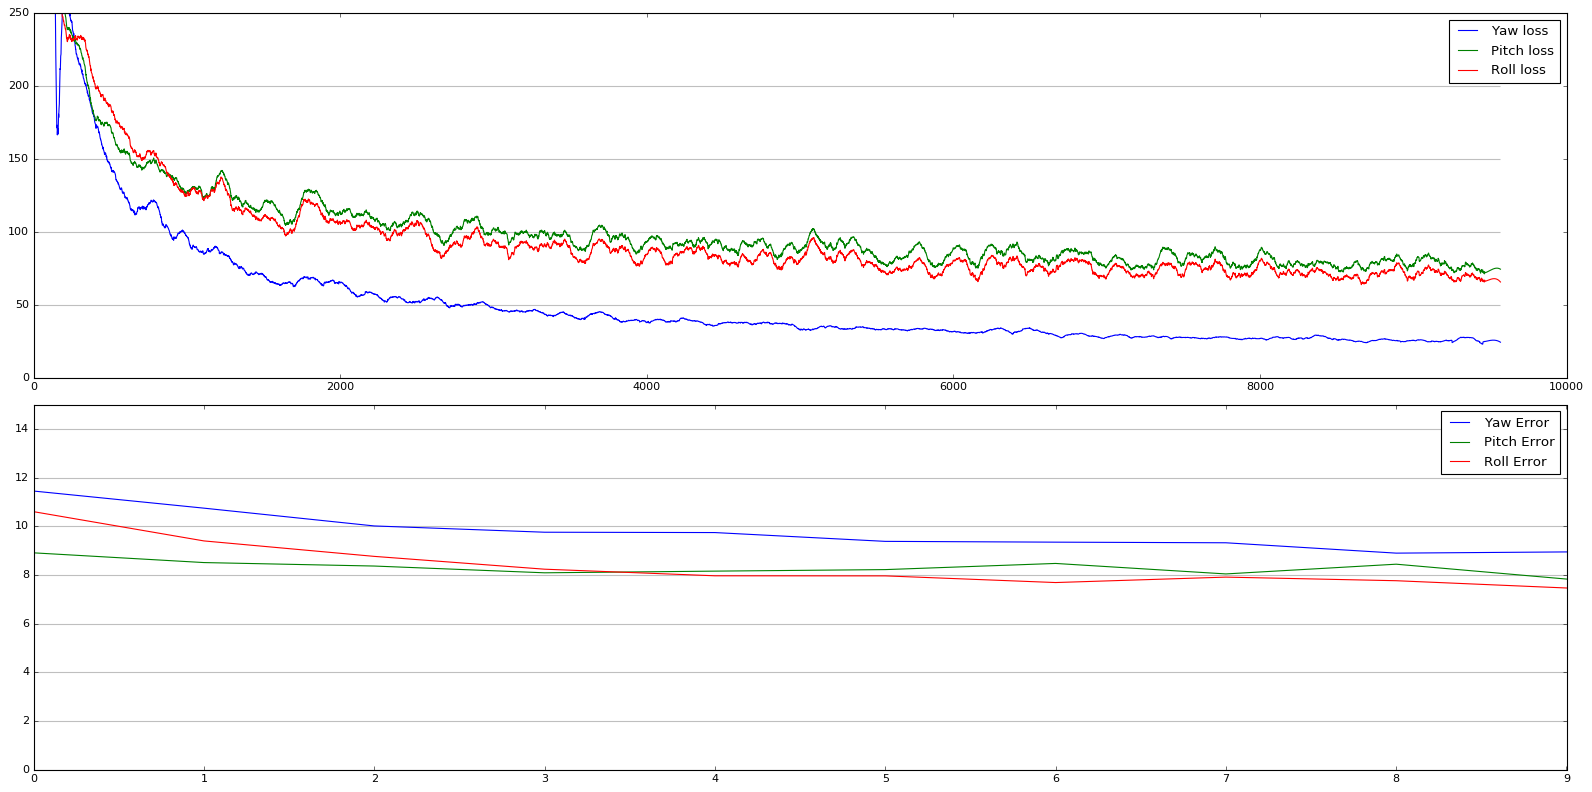

In [0]:
import pickle as pkl
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter # smoothing the curves
plt.style.use('classic')
%matplotlib inline

loss_file = gdrive_workspace + "/lossesshufflenet_half.pkl"
with open(loss_file, "rb") as file_handle:
  training_stats = pkl.load(file_handle)
  
print(len(training_stats["loss_yaw"]))

smoothing = lambda x: savgol_filter(x, 201, 3)

train_samples = len(training_stats["loss_yaw"])
val_samples = len(training_stats["val_yaw_error"])


f, axes = plt.subplots(2, 1, sharex="none", figsize=(20, 10), dpi= 80, facecolor='w', edgecolor='k')
axes[0].plot(range(train_samples), smoothing(training_stats["loss_yaw"]), label="Yaw loss")
axes[0].plot(range(train_samples), smoothing(training_stats["loss_pitch"]), label="Pitch loss")
axes[0].plot(range(train_samples), smoothing(training_stats["loss_roll"]), label="Roll loss")
axes[0].hlines(list(range(0, 500, 50)), 0, train_samples-1, color='0.75')
axes[0].set_ylim(0, 250)
axes[0].legend()

axes[1].plot(training_stats["val_yaw_error"], label="Yaw Error")
axes[1].plot(training_stats["val_pitch_error"], label="Pitch Error")
axes[1].plot(training_stats["val_roll_error"], label="Roll Error")
axes[1].hlines(list(range(0, 35, 2)), 0, val_samples-1, color='0.75')
axes[1].set_ylim(0, 15)
axes[1].legend()

f.tight_layout()
plt.show()

## Test ShuffleNet x0.5

In [0]:
model_path = os.path.join(gdrive_workspace, "shufflenet_half", "shufflenet_half_epoch_10.pkl")

print("Batch Size=1")
filename_list = os.path.join(colab_data_dir, testdata_prefix) + "_filenames.txt"
!python test_hopenet.py --batch_size 1 --dataset AFLW2000 --data_dir /content/data --backbone shufflenet --shufflenet_mult 0.5 --filename_list {filename_list} --snapshot {model_path.replace(" ", "\ ")}

print("\nBatch Size=64")

!python test_hopenet.py --batch_size 64 --dataset AFLW2000 --data_dir /content/data --backbone shufflenet --shufflenet_mult 0.5 --filename_list {filename_list} --snapshot {model_path.replace(" ", "\ ")}

Batch Size=1
Loading snapshot.
Loading data.
Ready to test network.
/usr/local/lib/python3.6/dist-packages/torch/nn/_reduction.py:46: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
Test error in degrees of the model on the 1969 test images. Yaw: 8.9424, Pitch: 7.8273, Roll: 7.4602
Average inference time per image: 16.183010ms

Batch Size=64
Loading snapshot.
Loading data.
Ready to test network.
/usr/local/lib/python3.6/dist-packages/torch/nn/_reduction.py:46: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
Test error in degrees of the model on the 1969 test images. Yaw: 8.9424, Pitch: 7.8273, Roll: 7.4602
Average inference time per image: 0.553490ms


# Experiment 2.3: Train Hopenet with SqueezeNet backbone

## Train


In [8]:
filename_list = os.path.join(colab_data_dir, traindata_prefix) + "_filenames.txt"
val_filename_list = os.path.join(colab_data_dir, testdata_prefix) + "_filenames.txt"
!python train_hopenet_shufflenet.py --num_epochs 30 --batch_size 128 --lr 10e-5 --dataset Pose_300W_LP --data_dir /content/data --alpha 2 --filename_list {filename_list} --val_filename_list {val_filename_list} --output_string squeezenet --out_dir {gdrive_workspace.replace(" ", "\ ")}

Downloading: "https://download.pytorch.org/models/shufflenetv2_x1-5666bf0f80.pth" to /root/.cache/torch/checkpoints/shufflenetv2_x1-5666bf0f80.pth
100% 9218294/9218294 [00:00<00:00, 67805744.78it/s]
Loading data.
Ready to train network.
Epoch [1/30], Iter [100/956] Losses: Yaw 264.0149, Pitch 276.7658, Roll 200.0918
Epoch [1/30], Iter [200/956] Losses: Yaw 156.4982, Pitch 260.7968, Roll 289.4809
Epoch [1/30], Iter [300/956] Losses: Yaw 124.0877, Pitch 135.3725, Roll 193.5433
Epoch [1/30], Iter [400/956] Losses: Yaw 87.3808, Pitch 71.4864, Roll 103.3333
Epoch [1/30], Iter [500/956] Losses: Yaw 128.6646, Pitch 132.4048, Roll 157.8455
Epoch [1/30], Iter [600/956] Losses: Yaw 96.7930, Pitch 84.5525, Roll 69.1636
Epoch [1/30], Iter [700/956] Losses: Yaw 39.8345, Pitch 68.0541, Roll 64.7720
Epoch [1/30], Iter [800/956] Losses: Yaw 28.0254, Pitch 90.5504, Roll 112.4715
Epoch [1/30], Iter [900/956] Losses: Yaw 41.1848, Pitch 83.3978, Roll 74.2588
Epoch completed in 922.6 seconds. Taking snapsh

## Display Losses


19140


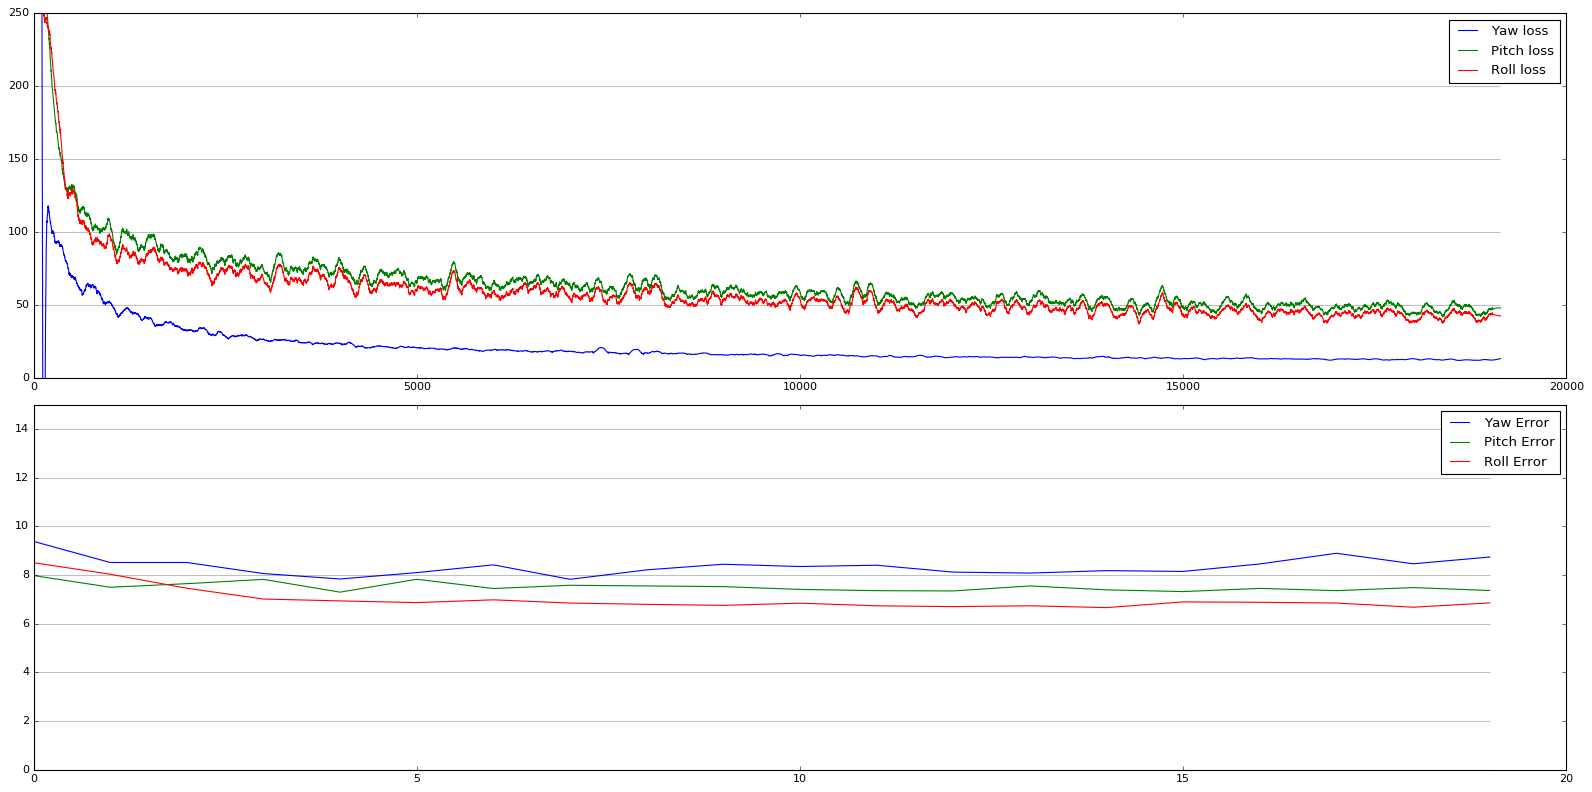

In [9]:
import pickle as pkl
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter # smoothing the curves
plt.style.use('classic')
%matplotlib inline
loss_file = gdrive_workspace + "/lossessqueezenet.pkl"
with open(loss_file, "rb") as file_handle:
  training_stats = pkl.load(file_handle)
  
print(len(training_stats["loss_yaw"]))

smoothing = lambda x: savgol_filter(x, 201, 3)

train_samples = len(training_stats["loss_yaw"])
val_samples = len(training_stats["val_yaw_error"])


f, axes = plt.subplots(2, 1, sharex="none", figsize=(20, 10), dpi= 80, facecolor='w', edgecolor='k')
axes[0].plot(range(train_samples), smoothing(training_stats["loss_yaw"]), label="Yaw loss")
axes[0].plot(range(train_samples), smoothing(training_stats["loss_pitch"]), label="Pitch loss")
axes[0].plot(range(train_samples), smoothing(training_stats["loss_roll"]), label="Roll loss")
axes[0].hlines(list(range(0, 500, 50)), 0, train_samples-1, color='0.75')
axes[0].set_ylim(0, 250)
axes[0].legend()

axes[1].plot(training_stats["val_yaw_error"], label="Yaw Error")
axes[1].plot(training_stats["val_pitch_error"], label="Pitch Error")
axes[1].plot(training_stats["val_roll_error"], label="Roll Error")
axes[1].hlines(list(range(0, 35, 2)), 0, val_samples-1, color='0.75')
axes[1].set_ylim(0, 15)
axes[1].legend()

f.tight_layout()
plt.show()

## Test

In [13]:
model_path = os.path.join(gdrive_workspace, "squeezenet", "squeezenet_epoch_15.pkl")

print("Batch Size=1")
filename_list = os.path.join(colab_data_dir, testdata_prefix) + "_filenames.txt"
!python test_hopenet.py --batch_size 1 --dataset AFLW2000 --data_dir /content/data --backbone squeezenet --filename_list {filename_list} --snapshot {model_path.replace(" ", "\ ")}

print("\nBatch Size=64")

!python test_hopenet.py --batch_size 64 --dataset AFLW2000 --data_dir /content/data --backbone squeezenet --filename_list {filename_list} --snapshot {model_path.replace(" ", "\ ")}

Batch Size=1
Loading snapshot.
Loading data.
Ready to test network.
/usr/local/lib/python3.6/dist-packages/torch/nn/_reduction.py:46: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
Test error in degrees of the model on the 1969 test images. Yaw: 8.1746, Pitch: 7.3840, Roll: 6.6543
Average inference time per image: 16.368154ms

Batch Size=64
Loading snapshot.
Loading data.
Ready to test network.
/usr/local/lib/python3.6/dist-packages/torch/nn/_reduction.py:46: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
Test error in degrees of the model on the 1969 test images. Yaw: 8.1746, Pitch: 7.3840, Roll: 6.6543
Average inference time per image: 0.603543ms
